## Homework 5 Implement the Kernelized K-Means 

In [167]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy import exp
import random
from scipy.spatial.distance import pdist, squareform
import numpy.matlib

In [168]:
class Kernel_KMeans:
    def __init__(self, K=2, gamma = 1, max_iters=100, plot_steps=False):
        self.K = K
        self.gamma = gamma
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # Z is a matrix with size N_samples x cluster_number
        # In each row, 1 only occurs at the column representing the cluster, other element are zeros
        # For example, if there are three clusters (K=3), a row [0, 1, 0]
        # means the element belongs to the second cluster 
        self.Z = []
        
    def predict(self, X):
        self.X = X
        # each row of X is a sample, number of columns are number of features 
        self.N, self.n_features = X.shape
        
        # Convert pairwise distances into a square matrix.

        # Compute the symmetric kernel matrix.
        
        
        # initialize the Z and clusters

        
        # initialize the distance matrix N x K
        # Each row store the distances between each sample and clusters

                


            if self.plot_steps:
                self.plot()

    def plot(self):
        fig, ax = plt.subplots(figsize=(6, 4))
        for k in np.arange(self.K):
            index=np.where(self.Z[:,k]==1)
            point = self.X[index].T
            ax.scatter(*point)

        plt.show()

<ipython-input-168-83c6bf8409f3>:24: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  Ke = exp(-self.gamma * mat_sq_dists)    # K(xm,xn)=exp(-r*(xn-xm)^2)


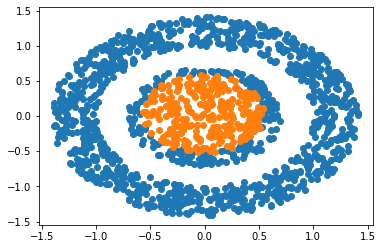

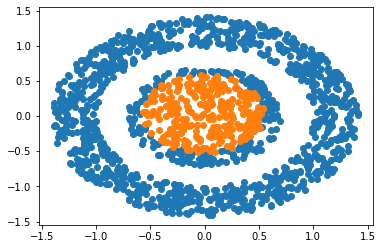

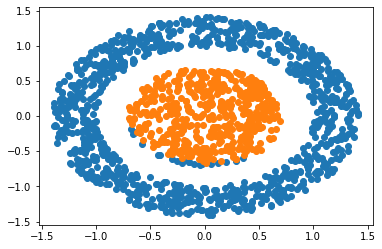

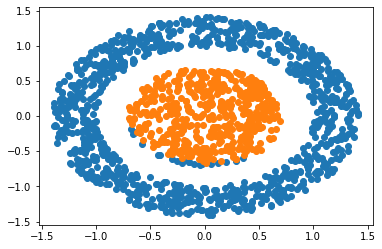

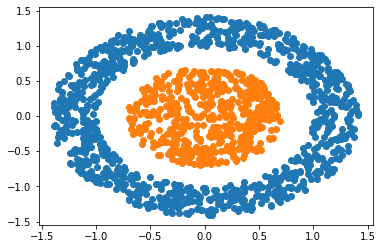

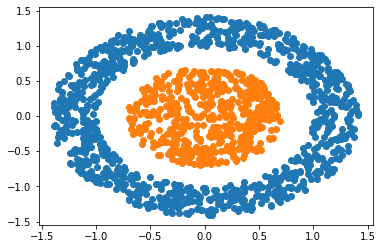

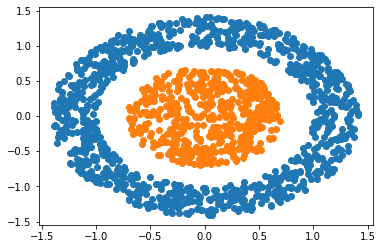

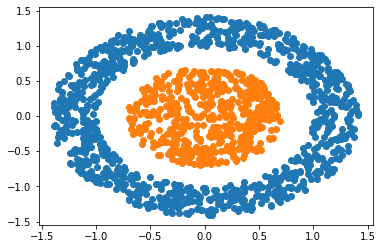

In [172]:
# Testing
import csv
import pandas as pd
from sklearn.datasets import make_moons

#    X, y = make_moons(100, random_state=123)
df = pd.read_csv('X.csv', header=None, skiprows=0, dtype=np.float32)  
X = df.to_numpy()
clusters=2
k = Kernel_KMeans(K=clusters, gamma = 1, max_iters=200, plot_steps=True)
y_pred = k.predict(X)

k.plot()

In [ ]:
# The following are hints

In [139]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy import exp
import random
from scipy.spatial.distance import pdist, squareform

df = pd.read_csv('X.csv', header=None, skiprows=0, dtype=np.float32)  
X = df.to_numpy()
X = X[0:10,:]

K = 2
print(X)
print(X.shape)

[[ 0.28395  -0.63063 ]
 [-0.19803   0.61805 ]
 [ 0.31138   0.61    ]
 [ 0.086885  0.53374 ]
 [ 0.31307   0.36939 ]
 [-1.0001    0.95492 ]
 [ 0.31112  -0.1668  ]
 [-0.49512   0.28782 ]
 [-1.0849   -0.39157 ]
 [-0.90562  -0.55786 ]]
(10, 2)


In [140]:
sq_dists = pdist(X, 'sqeuclidean') # C(100,2)=100x99/2!=50x99=4950
# Convert pairwise distances into a square matrix.
mat_sq_dists = squareform(sq_dists)  
# Compute the symmetric kernel matrix.
gamma=1
Ke = exp(-gamma * mat_sq_dists)    # K(xm,xn)=exp(-r*(xn-xm)^2)
print(Ke)

[[1.         0.16670884 0.21439927 0.24793414 0.3675529  0.01556465
  0.80583483 0.23445291 0.14501761 0.24162407]
 [0.16670884 1.         0.77138834 0.91550017 0.72393405 0.46916642
  0.41676898 0.82093258 0.16433127 0.1520649 ]
 [0.21439927 0.77138834 1.         0.94533719 0.94374806 0.15898433
  0.54693881 0.47036693 0.05219647 0.05813508]
 [0.24793414 0.91550017 0.94533719 1.         0.92480667 0.2569358
  0.5821439  0.6708522  0.10760602 0.1134201 ]
 [0.3675529  0.72393405 0.94374806 0.92480667 1.         0.1265319
  0.75013391 0.51694194 0.0793902  0.09584741]
 [0.01556465 0.46916642 0.15898433 0.2569358  0.1265319  1.
  0.05091724 0.49657179 0.16198908 0.10051686]
 [0.80583483 0.41676898 0.54693881 0.5821439  0.75013391 0.05091724
  1.         0.42455985 0.13541739 0.19526765]
 [0.23445291 0.82093258 0.47036693 0.6708522  0.51694194 0.49657179
  0.42455985 1.         0.44512004 0.41325727]
 [0.14501761 0.16433127 0.05219647 0.10760602 0.0793902  0.16198908
  0.13541739 0.4451200

<ipython-input-140-a8faa74eb2ef>:6: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  Ke = exp(-gamma * mat_sq_dists)    # K(xm,xn)=exp(-r*(xn-xm)^2)


In [141]:
row=np.zeros((1,K))
row[0,0]=1
print(row)

[[1. 0.]]


In [142]:
N=X.shape[0]
Z = np.matlib.repmat(row,N,1); 
#Z = np.matlib.repmat([1, 0],N,1); 
print(N)
print(Z)

10
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [143]:
s = np.sum(X*X,1)
print(s)
pos = np.argmin(s)
print(pos)
#Z[pos,:]= [0,1]
Z[pos,:]=0
print(Z)
Z[pos,-1]=1
Z_old=Z

[0.47832185 0.42120165 0.46905753 0.29242736 0.23446181 1.9120722
 0.1246179  0.32798415 1.3303351  1.1313554 ]
6
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [145]:
di = np.zeros((N,K))
print(di)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [146]:
Nk = np.sum(Z,0)
print(Nk)

[9. 1.]


In [148]:
np.diag(Ke)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [147]:
np.diag(Ke).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [149]:
np.matlib.repmat(Z[:,0].T,N,1)*Ke

array([[1.        , 0.16670884, 0.21439927, 0.24793414, 0.3675529 ,
        0.01556465, 0.        , 0.23445291, 0.14501761, 0.24162407],
       [0.16670884, 1.        , 0.77138834, 0.91550017, 0.72393405,
        0.46916642, 0.        , 0.82093258, 0.16433127, 0.1520649 ],
       [0.21439927, 0.77138834, 1.        , 0.94533719, 0.94374806,
        0.15898433, 0.        , 0.47036693, 0.05219647, 0.05813508],
       [0.24793414, 0.91550017, 0.94533719, 1.        , 0.92480667,
        0.2569358 , 0.        , 0.6708522 , 0.10760602, 0.1134201 ],
       [0.3675529 , 0.72393405, 0.94374806, 0.92480667, 1.        ,
        0.1265319 , 0.        , 0.51694194, 0.0793902 , 0.09584741],
       [0.01556465, 0.46916642, 0.15898433, 0.2569358 , 0.1265319 ,
        1.        , 0.        , 0.49657179, 0.16198908, 0.10051686],
       [0.80583483, 0.41676898, 0.54693881, 0.5821439 , 0.75013391,
        0.05091724, 0.        , 0.42455985, 0.13541739, 0.19526765],
       [0.23445291, 0.82093258, 0.4703669

In [150]:
k=0
2/Nk[k]*np.sum(np.matlib.repmat(Z[:,k].T,N,1)*Ke,1).reshape(-1,1)

array([[0.58516764],
       [1.1520059 ],
       [1.02545682],
       [1.15164273],
       [1.06194514],
       [0.61916907],
       [0.86844057],
       [1.12633237],
       [0.68835767],
       [0.69262767]])

In [151]:
k=0
np.sum(np.matmul(Z[:,k],Z[:,k].T)*Ke)

407.503239270199

In [152]:
Z[:,k].reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [153]:
Z[:,k].reshape(1,-1)

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1.]])

In [154]:
np.sum(np.matmul(Z[:,k].reshape(-1,1),Z[:,k].reshape(1,-1))*Ke)

36.462172573748965

In [155]:
for k in np.arange(K):
    tmp=np.diag(Ke).reshape(-1,1) - 2/Nk[k]*np.sum(np.matlib.repmat(Z[:,k].T,N,1)*Ke,1).reshape(-1,1) + \
    1/(Nk[k]*Nk[k])*np.sum(np.matmul(Z[:,k].reshape(-1,1),Z[:,k].reshape(1,-1))*Ke)
#    di[:,k]=tmp
    di[:,k]=np.squeeze(tmp)
    print(k)
    print(di)

0
[[0.86498264 0.        ]
 [0.29814437 0.        ]
 [0.42469346 0.        ]
 [0.29850755 0.        ]
 [0.38820514 0.        ]
 [0.83098121 0.        ]
 [0.58170971 0.        ]
 [0.32381791 0.        ]
 [0.7617926  0.        ]
 [0.75752261 0.        ]]
1
[[0.86498264 0.38833035]
 [0.29814437 1.16646205]
 [0.42469346 0.90612237]
 [0.29850755 0.83571221]
 [0.38820514 0.49973217]
 [0.83098121 1.89816552]
 [0.58170971 0.        ]
 [0.32381791 1.15088029]
 [0.7617926  1.72916521]
 [0.75752261 1.60946471]]


In [156]:
np.min(di,1)

array([0.38833035, 0.29814437, 0.42469346, 0.29850755, 0.38820514,
       0.83098121, 0.        , 0.32381791, 0.7617926 , 0.75752261])

In [157]:
np.min(di,1).reshape(-1,1)

array([[0.38833035],
       [0.29814437],
       [0.42469346],
       [0.29850755],
       [0.38820514],
       [0.83098121],
       [0.        ],
       [0.32381791],
       [0.7617926 ],
       [0.75752261]])

In [158]:
np.matlib.repmat(np.min(di,1).reshape(-1,1),1,K)

array([[0.38833035, 0.38833035],
       [0.29814437, 0.29814437],
       [0.42469346, 0.42469346],
       [0.29850755, 0.29850755],
       [0.38820514, 0.38820514],
       [0.83098121, 0.83098121],
       [0.        , 0.        ],
       [0.32381791, 0.32381791],
       [0.7617926 , 0.7617926 ],
       [0.75752261, 0.75752261]])

In [160]:
Z=di==np.matlib.repmat(np.min(di,1).reshape(-1,1),1,K)
print(Z)

[[False  True]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [ True False]]


In [161]:
Z=np.multiply(Z, 1)
print(Z)

[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]]


In [164]:
np.sum(Z!=Z_old)

2

In [163]:
np.sum(Z!=Z_old)==0

False

In [165]:
ind=np.where(Z[:,0]==1)
print(ind)

(array([1, 2, 3, 4, 5, 7, 8, 9], dtype=int64),)


In [166]:
X[ind].T

array([[-0.19803 ,  0.31138 ,  0.086885,  0.31307 , -1.0001  , -0.49512 ,
        -1.0849  , -0.90562 ],
       [ 0.61805 ,  0.61    ,  0.53374 ,  0.36939 ,  0.95492 ,  0.28782 ,
        -0.39157 , -0.55786 ]], dtype=float32)